# Lab 2: Introduction to Python and Jupyter Notebooks, Part II

In this lab session we will continue our introduction to Python/NumPy/Matplotlib. We will see how to perform some basic operation on vectors, matrices, and a special type of matrix, the *image*. 

As usual, before we start, we need to import the needed libraries and set some useful plotting parameters. We can do this by running the code cell below.

In [4]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
import matplotlib.pyplot as plt

# show matplotlib figures inline
%matplotlib inline

In [2]:
# By default we set figures to be 6"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(6, 4), dpi=110)
plt.rc('font', size=10)

You'll notice the line [`%matplotlib inline`](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) looks very different to all other python code so far. This is a special command just for jupyter notebooks which will plot the figures inline and doesn't require a call to [`plt.show()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.show.html).

## 1. Functions 

Let's start creating a function called `test_normal(n, mean_dist, var_dist)` that generates a *random sequence* of `n` numbers from the normal distribution $\mathcal{N}(\mu, \sigma^2)$ and returns the *mean* and *var* of the *sequence*. 

### Default Value Parameters
Python allows you to have default values for parameters if you want them to be optional. For example if we define the function as `test_normal(n=100, mean_dist=5.0, var_dist=2.0)` then we can actually call the function using `test_normal()` and pass no parameters. We could also call the function using `test_normal(var_dist=10, mean_dist=0.5)`. You can find more info [here](https://www.programiz.com/python-programming/function-argument).

Write the function so that when no parameters are passed it generates a sequence of 10000 elements from the distribution $\mathcal{N}(0, 1)$. 

Call the function multiple times with no arguments and observe the output.

Hint: you can use the function [`numpy.random.randn`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) to generate a random sequence from the normal distribution.

In [3]:
# write your code here

In [4]:
##CORRECT ANSWER##

def test_normal(n=10000, mean_dist=0.0, var_dist=1.0):
    sequence = np.sqrt(var_dist) * np.random.randn(n) + mean_dist
    mean = sequence.mean()
    var = sequence.var()
    
    return mean, var

n_calls = 10

print('call\tmean\tvar')

for call in range(n_calls):
    mean, var = test_normal()
    print('{}\t{:0.3f}\t{:0.3f}'.format(call+1, mean, var))
      
##CORRECT ANSWER##

call	mean	var
1	0.011	0.980
2	0.006	1.002
3	0.003	0.975
4	-0.006	0.995
5	-0.015	1.019
6	0.001	1.012
7	0.006	1.004
8	0.000	1.000
9	-0.001	0.979
10	0.011	0.994


### Play now a little with the parameters of the function. 

- What do you observe when you create a sequence with a very small number of elements? 
- What happens when the sequence contains a very large number of elements instead?

### CORRECT ANSWER

As the sequence grows larger it better approximates the normal distribution it is generated from, and thus the calculated mean and variance of the sequence will get closer to the distribution's  mean and variance. Conversely, when the sequence contains a small number of elements it will provide a poor approximation of the normal distribution, and thus its mean and variance are far from the nominal values.

## 2. 2D Normal distribution

Given the following 2D normal distribution $\mathcal{N}(\mathbf{\mu},\mathbf{C})$ with:
$$
\mathbf{\mu}=\left [ \begin{array}{c}2\\2\end{array}\right ] \;\;\;\;\;
\mathbf{C}=\left [ \begin{array}{cc}4& 2\\2& 6\end{array}\right ] 
$$

Estimate the probability that the following vectors:

- $x_1 = (1, 2)$
- $x_2 = (2,8)$
- $x_3 = (5,4)$ 

are sampled from the distribution. Hint: use SciPy's function [`stats.multivariate_normal.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html).

In [5]:
# write your code here

In [6]:
##CORRECT ANSWER##
mu = np.array([2, 2])
cm = np.array([[4,2], [2, 6]])

x1 = (1, 2)
x2 = (2, 8)
x3 = (5, 4)

print('x1:', stats.multivariate_normal.pdf(x1, mean=mu, cov=cm))
print('x2:', stats.multivariate_normal.pdf(x2, mean=mu, cov=cm))
print('x3:', stats.multivariate_normal.pdf(x3, mean=mu, cov=cm))
##CORRECT ANSWER##

x1: 0.030630984921987542
x2: 0.0009724001092355
x3: 0.011268509615631653


### Observe the obtained values. Which vector has the highest likelihood? Why?

### CORRECT ANSWER

The vector with highest likelihood is $x_1$. This is because it is closest to the mean of the distribution. The normal distribution is denser around its mean (its density being controlled by the variance), and thus $x_1$ has a higher probability of being sampled from the distribution.

## 3. Random vectors

Generate a sequence of 100 random vectors from the 2D distribution above using the function [`stats.multivariate_normal.rvs`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html).

In [7]:
# write your code here

In [8]:
##CORRECT ANSWER##
rs1 = stats.multivariate_normal.rvs(mean=mu, cov=cm, size=100)
##CORRECT ANSWER##

Create now a scatter plot of the sequence using the function [`plt.scatter`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). Compute the mean and covariance for the sequence using the functions [`np.mean`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.mean.html) (consider the `axis` parameter) and [`np.cov`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html) (consider the `rowvar` parameter).

In [9]:
# write your code here

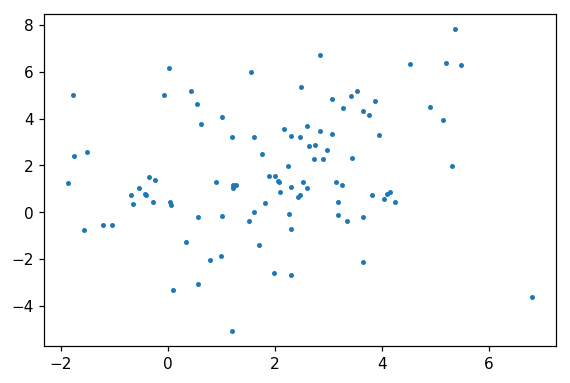

rs1 mean:
	 [1.98426701 1.7457792 ]
rs1 cov:
	 [[3.39936517 1.11408882]
 [1.11408882 6.38709064]]


In [10]:
##CORRECT ANSWER##
fig1, ax1 = plt.subplots()
ax1.scatter( rs1[:,0], rs1[:,1], s=5 )
plt.show()

rs1_mean = rs1.mean(axis=0)
rs1_cov  = np.cov(rs1, rowvar=0)

print('rs1 mean:\n\t', rs1_mean)
print('rs1 cov:\n\t', rs1_cov )
##CORRECT ANSWER##

Let's increase now the length of the sequence to 4000. Plot the new data and compute the new mean and covariance.

In [11]:
# put your code here

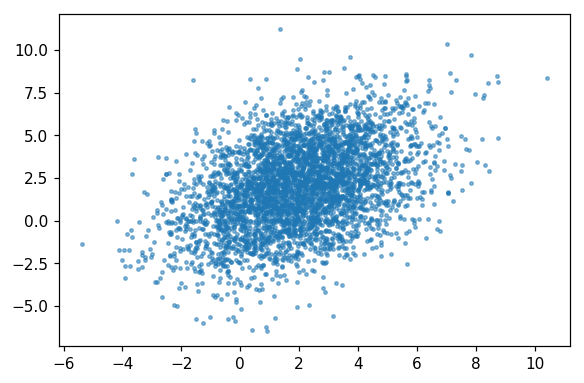

rs2 mean:
	 [1.97821232 1.99626026]
rs2 cov:
	 [[4.09345166 2.03364686]
 [2.03364686 6.11330248]]


In [12]:
##CORRECT ANSWER##
rs2 = stats.multivariate_normal.rvs(mean=mu, cov=cm, size=4000)

fig2, ax2 = plt.subplots()
ax2.scatter(rs2[:,0], rs2[:,1], s=5, alpha=0.5)
plt.show()

rs2_mean = rs2.mean(axis=0)
rs2_cov  = np.cov(rs2, rowvar=0)
print('rs2 mean:\n\t', rs2_mean)
print('rs2 cov:\n\t', rs2_cov )
##CORRECT ANSWER##

### Compare the two scatter plots above. What do you observe?

### CORRECT ANSWER

As the sample size increases, the estimated mean and covariance converge to the nominal values of the distribution from which the points were sampled.

## 4. Matrix Inverse

Create a function that takes a 2x2 matrix and returns its inverse.

Recall that the inverse of a 2x2 matrix
$$
\mathbf{A}=\left [ \begin{array}{cc}
    a & b \\
    c & d\end{array}\right ]
$$

is

$$
\mathbf{A}^{-1} = 
    \frac{1}{\det(\mathbf{A})} \left [ \begin{array}{cc}
        d & -b \\
        -c & a\end{array}\right ]
$$

where

$$\det{(\mathbf{A})} = ad - bc$$

### Before coding, answer the following question:

Given the definition above, are there any conditions you need to check before calculating the inverse of a matrix in your function?

### CORRECT ANSWER

The **shape** of the matrix must be 2x2. The matrix must not be **singular** (i.e. the determinant of the matrix must not equal 0).

In [13]:
# write your code here

In [14]:
##CORRECT ANSWER##
def invert_matrix(matrix):
    # check whether input matrix is 2x2
    if matrix.shape != (2, 2):
        print('Matrix should be 2x2')
        return None
    
    a = matrix[0, 0]
    b = matrix[0, 1]
    c = matrix[1, 0]
    d = matrix[1, 1]
        
    # calculate the determinant
    det =  a*d - b*c
    
    # check matrix singularity
    if det == 0:
        print('Singular matrix (det=0)!')
        return None
    
    # invers the matrix
    M = np.array([[d,-b], [-c, a]]) / float(det)
    
    return M
##CORRECT ANSWER##

Call now the function passing different random 2x2 matrices.

Try also your function with a singular 2x2 matrix and a random 2x3 matrix and make sure your code does not crash!

### What can we tell about the image by looking at the histogram? 

Recall we plotted the histogram of the grey scale image, and recall that our pixels have values ranging from 0 (black) to 255 (white).

In [15]:
# write your code here

In [16]:
##CORRECT ANSWER##
mx_r = np.random.rand(2, 2)

print('Random matrix:\n')
print(mx_r)
print('\nInverse of random matrix:\n')
print(invert_matrix(mx_r))

sing_m = np.array([[1,2], [1,2]])

print('\nSingular matrix:\n')
print(sing_m)
print('\nInverse of singular matrix:\n')
print(invert_matrix(sing_m))

rect_m = np.random.rand(2, 3)

print('\nRectangular random matrix:\n')
print(rect_m)
print('\nInverse of rectangular random matrix:\n')
print(invert_matrix(rect_m))

##CORRECT ANSWER##

Random matrix:

[[0.35760353 0.8053601 ]
 [0.17057214 0.6350877 ]]

Inverse of random matrix:

[[ 7.07716361 -8.9746112 ]
 [-1.90078782  3.98499083]]

Singular matrix:

[[1 2]
 [1 2]]

Inverse of singular matrix:

Singular matrix (det=0)!
None

Rectangular random matrix:

[[0.58061171 0.94386544 0.41486871]
 [0.22053721 0.94315929 0.15699937]]

Inverse of rectangular random matrix:

Matrix should be 2x2
None


Obviously, there was already a function in NumPy to calculate the inverse of a matrix, which is the function [`np.linalg.inv`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv). 

Compare now the results obtained with your function with those obtained with the NumPy one. Note that if you coded the function right, you should get the exact same results!

In [17]:
# write your code here

In [18]:
##CORRECT ANSWER##
print('My inverse:\n')
print(invert_matrix(mx_r))
print('\nBuit-in inverse:\n')
print(np.linalg.inv(mx_r))
##CORRECT ANSWER##

My inverse:

[[ 7.07716361 -8.9746112 ]
 [-1.90078782  3.98499083]]

Buit-in inverse:

[[ 7.07716361 -8.9746112 ]
 [-1.90078782  3.98499083]]


## 5. Loading images with Python

We will use the [scikit-image](https://scikit-image.org/) library to load, show and perform some operation on images. 

We have already imported all the needed functions in the first code cell of this notebook.

Let's now load the image `flower.png` using the function [`io.imread`](http://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread) and let's display the image using the function [`io.imshow`](http://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imshow).

In [19]:
# write your code here

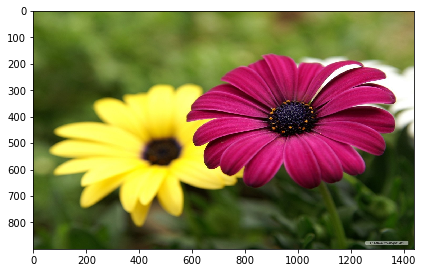

In [5]:
##CORRECT ANSWER##
im_flower = io.imread('flower.png')
io.imshow(im_flower)
##CORRECT ANSWER##

Remember that images can be interpreted as *matrices*. In fact, the scikit-image library stores images as NumPy arrays. 

Such arrays are either 2D, for grey scale images, or 3D, for colour images.

In the grey scale case, the 2D array simply stores the intensity value of each pixel. Usually values are in the range `[0, 255]` (8 bit images), but other ranges are also possible, such as `[0, 1]`.

In the colour case, the third dimension represents one of the three `[R, G, B]` colour channels. Each channel can be seen as a grey scale image which stores the intensity value of the corresponding colour. By combining the three colours we can obtain all the [other colours](https://en.wikipedia.org/wiki/RGB_color_model).

#### Note:
* A number of different colour models exist, such as CMY or HSL. Depending on the used colour model, pixels in matrices are organised in different ways. Here we assume we are dealing only with the RGB colour model, which is the predominant model for monitors, and thus assume our matrices are in the form seen above. You can learn more about this topic [here](https://en.wikipedia.org/wiki/Color_space) and [here](https://en.wikipedia.org/wiki/Color_model#CMYK_color_model)

We can check the size/shape of an image/matrix by using the property `shape` of NumPy's arrays. 

In [21]:
print('Image shape:', im_flower.shape)

Image shape: (900, 1440, 3)


In our case, the flower image has resolution 1440x900. Note how rows represent the height of the image, while columns represent its width. Since our image is in colours, we have a 3D array.

## 6. Image manipulation

Let's convert our colour image to a grey scale one using the function [`color.rgb2gray`](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray). Let's then change the size of the image to half its current size using the function [`transform.resize`](http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).

Print both images' size to check your operation was perfomed correctly.

In [22]:
# write your code here

Original image size: (900, 1440)
Resized image size: (450, 720)


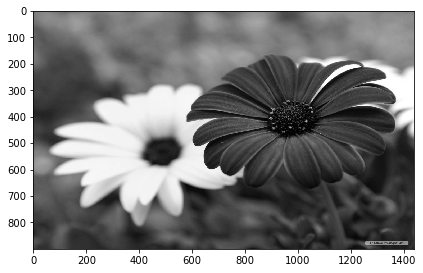

In [6]:
##CORRECT ANSWER##
im_flower_gray = color.rgb2gray(im_flower)

# plt.imshow(im_flower_gray, cmap = plt.get_cmap('gray'))
# plt.show()

io.imshow(im_flower_gray)

im_half_size = tuple( [i/2 for i in im_flower_gray.shape] )
im_flower_gray_half = transform.resize(im_flower_gray, im_half_size)

print('Original image size:', im_flower_gray.shape)
print('Resized image size:', im_flower_gray_half.shape)
##CORRECT ANSWER##

In [24]:
def imhist(img_hist):
    fig, ax = plt.subplots()
    ax.bar( range(256), img_hist[0], width=1 )
    ax.set_xlim(0, 256)

## 7. Image interpretation

Calculate the histogram of your grey scale image's pixel values using the function [`exposure.histogram`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.histogram).

You can use the following function `imhist` to plot the histogram.

In [3]:
# write your code here

##CORRECT ANSWER##
im_flower_hist = exposure.histogram(im_flower_gray_half)
imhist(im_flower_hist)
##CORRECT ANSWER##

NameError: name 'exposure' is not defined

### CORRECT ANSWER

The histogram shows that the image is somewhat dark, given that the intensity of the pixels is largely distributed between 0 and 100. The peak to the right corresponds to the pixel depicting the yellow petals in the original colour image (left hand-side flower).

## 8. Image Interpretation  II

Use the function [`exposure.equalize_hist`](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist) to [equalize](https://en.wikipedia.org/wiki/Histogram_equalization) the image. Show the image and its corresponding histogram.

In [26]:
# write your code here

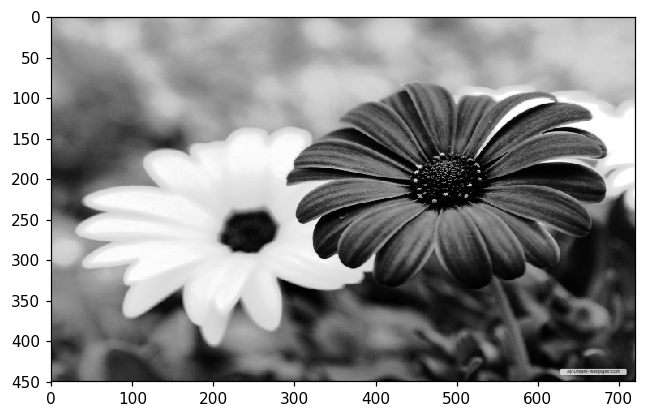

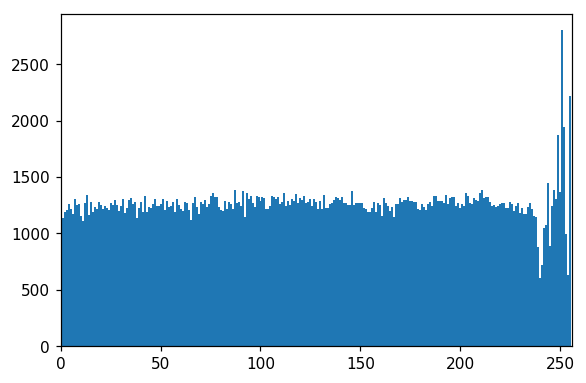

In [27]:
##CORRECT ANSWER##
im_eq = exposure.equalize_hist(im_flower_gray_half)
io.imshow(im_eq)

im_eq_hist = exposure.histogram(im_eq)
imhist(im_eq_hist)
##CORRECT ANSWER##

### Observe the resulting image and its histogram. What can we tell about the equalised image? 

### CORRECT ANSWER

The histogram looks flat, which is the result of equalising the image so that the pixel values cover the whole [0, 255] range. Given that the original image looked somewhat dark, this results in having an overall brigher image. The equalised image also looks more contrasted. 